<a href="https://colab.research.google.com/github/foxtrotmike/PCA-Tutorial/blob/master/pca-lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

## by

## Fayyaz Minhas

The objective of this tutorial is to provide a fundamental (though somewhat simplistic) description of principal component analysis in a "learn-by-doing" style approach in which you are asked questions that can be answered by playing with the code included in the tutorial.

Note: When going through the tutorial, you can safely ignore "Advanced" topics.

# What is PCA?

How can we find redundant or dimensions with little or no information in a given data? Remember, that for a given variable, the amount of information in it is proportional to its variance -- if all data is constant, then its variance is zero and so is its information content. If we have very high dimensional data, we can reduce its dimensionality by projecting it along directions (or vectors) such that the variance along the chosen direction is maximized in order to preserve the most information in the data. For example, consider two (related) variables: height and weight of all individuals in a class. If we can predict the weight from the  height then we do not need to store the weight dimension for all data points. However, without such a prediction system in place, or, if there is no relationship between weight and height, it will be impossible to reconstruct weight from height and the information of weight will be lost for ever if the weight dimension is dropped. On the other hand, if the weight of an individual is linearly dependent on his or her height, i.e., $w \approx ah+b$, then we can fit a simple line to get one from the other by reducing the error between the true value of weight and the value predicted on the basis of height (called the reconstruction error). If the reconstruction error is low, we can simply store the linear predictor $(a,b)$ and the height values and throw away the weight values of individual samples without much loss in information.

Principal component analysis is a method for finding orthogonal directions of maximum variance in the data such that if the data is projected in those directions, the variance of the projected data is maximum. The dimensionality of the data can be reduced by projecting it along those directions. This projection along the direction of maximum variance gives minimum information loss.

Below, we discuss how finding the direction of maximum variance for a given data set corresponds to finding the eigen vector of the covariance matrix of the data and how it leads to a minimum loss in information if the data is projected in that direction.

Let's assume that we are given $N$ $d$-dimensional data points $\mathbf x_i, i=1...N$. We want to find the direction vector $\mathbf w$ such that the projection $z_i=\mathbf w^T \mathbf x_i$ for a point $\mathbf x_i$ has maximum variance.

To find the direction of maximum variance, we will need to develop a mathematical formula that can help us calculate the variance of the data after it has been projected along a certain direction so that we can search for the direction of maximum variance by optimizing over that formula. Let's calculate the variance after projection of the data along $\mathbf w$. We know that variance of the values $z_i, i=1...N$ is the expected (average) value of the squared deviation $(z_i-\mu_z)$ around the mean value $\mu_z = \frac{1}{N}\sum_{i=1}^{N}z_i=\frac{1}{N}\sum_{i=1}^{N}\mathbf w^T\mathbf x_i=\mathbf w^T\frac{1}{N}\sum_{i=1}^{N}\mathbf x_i=\mathbf w^T\mu_x$ where $\mathbf{\mu_x}=\frac{1}{N}\sum_{i=1}^{N}\mathbf x_i$ is the $d$-dimensional vector of average values of all data points along each of the $d$ data dimensions. Therefore,

$var(z)=var(\mathbf w^T \mathbf x)=\frac{1}{N}\sum_{i=1}^{N}[(\mathbf w^T \mathbf x_i-\mathbf w^T\mathbf\mu_x)^2]$

$=\frac{1}{N}\sum_{i=1}^{N}[(\mathbf w^T\mathbf x_i-\mathbf w^T\mathbf\mu_x)(\mathbf w^T\mathbf x_i-\mathbf w^T\mathbf\mu_x)]$

$=\frac{1}{N}\sum_{i=1}^{N}[(\mathbf w^T\mathbf x_i-\mathbf w^T\mathbf\mu_x)(\mathbf x_i^T\mathbf w-\mathbf \mu_x^T \mathbf w)]$

$=\frac{1}{N}\sum_{i=1}^{N}[\mathbf w^T(\mathbf x_i-\mathbf \mu_x)(\mathbf x_i-\mathbf \mu_x)^T\mathbf w]$

$=\mathbf w^T\frac{1}{N}\sum_{i=1}^{N}[(\mathbf x_i-\mathbf \mu_x)(\mathbf x_i-\mathbf \mu_x)^T]\mathbf w$

$=\mathbf w^T\mathbf C \mathbf w$

Here, $\mathbf C=\frac{1}{N}\sum_{i=1}^{N}[(\mathbf x_i-\mathbf \mu_x)(\mathbf x_i-\mathbf \mu_x)^T]$ is the $d \times d$ sized "covariance matrix". The covariance of two variable $a$ and $b$ over $N$ values $a_i,b_i, i=1...N$ is given by $c(a,b) = \frac{1}{N}\sum_{i=1}^{N}[(a_i-\mu_a)(b_i-\mu_b)^T]$ is a measure of the linear relationship between two variables - in our case two dimensions of $\mathbf x$ or two of our features. Covariance will be high (positive) if increase in values of one variable above its mean correlates with increase in values of the other variable above the other variable's mean value. Covariance will be high (negative) if increase in values of one variable above its mean correlates with decrease in values of the other variable below the other variable's mean value. Covariance will be low (small positive or negative) if increase in values of one variable above its mean has little effect or little correlation with increase in values of the other variable above the other variable's mean value. In our example below, we take two variables, height and weight of a person which are expected to be correlated and exhibit high covariance. It is interesting to note that if we take a single variable $b=a$ then variance becomes covariance. A covariance matrix of $d$ variables is a $d \times d$ matrix of all pairwise covariances. Note that the covariance matrix will be symmetric since $cov(a,b)=cov(b,a)$.  It is typically better to scale the variables to the same range prior to covariance calculation to reduce effects of differences in range of values from affecting the covariance value. This can be achieved by subtracting the value of a variable from its mean and dividing by its standard deviation in a process called mean-standard deviation normalization (or standardization).

Uptil now we have expressed the variance of the projected data in terms of $\mathbf w$ used for projection and the covariance matrix of the data which can be calculated beforehand. Remember that we are interested in finding the direction of maximum variance as the projection of the given data along this direction entails minimum loss in information. Mathematically, this can be represented as the following optimization problem:

$max_\mathbf w var(z)=\mathbf w^TC\mathbf w$

We can solve this problem by taking the derivative of the function and substituting it to zero in which case we would get the trivial solution $C\mathbf w=\mathbf0$ or $\mathbf w=\mathbf0$. To overcome this, we need to add a constraint that specifies that $\mathbf w$ is a unit vector with norm equal to 1.0, i.e.,  $||\mathbf w||^2=\mathbf w^T\mathbf w=1.0$. However, this complicates our optimization which has now become constrained:

$max_\mathbf w var(z)=\mathbf w^TC\mathbf w$

such that:

$\mathbf w^T\mathbf w=1.0$

Fortunately, we can solve this by using the method of Lagrange multipliers (https://en.wikipedia.org/wiki/Lagrange_multiplier) which essentially says that one can convert a constrained optimization problem to an unconstrained optimization problem by modifying the objective function and the use of a single additional variable, called a Lagrange multiplier, for each constraint. In this case, the resulting unconstrained objective function with the introduction of the Lagrange multiplier variable $\alpha$,  can be written as:

$max_{\mathbf w,\alpha} \mathbf w^TC\mathbf w -\alpha(\mathbf w^T\mathbf w-1)$

Taking the derivative with respect to $\mathbf w^T$ and substituting to zero, we get:

$\mathbf C\mathbf w=\alpha \mathbf w$

Note that there is a trivial solution to this $\mathbf w = \mathbf 0$. However, by constraining $||\mathbf w||=1$, we can find a non-trivial solution. For this purpose, note that the above equation is an Eigen value problem with eigen vector $\mathbf w$ and eigen value $\alpha$. An Eigen vector $\mathbf w$ is a property of a matrix $\mathbf C$ such that the vector resulting from matrix multiplication $\mathbf C\mathbf w$ is in the same direction as $\mathbf w$ with only scaling by a corresponding constant factor $\alpha$ called Eigen value. The number of Eigen values and vectors is equal to the number of dimensions of the matrix. These vectors of a covriance matrix are called principal components as they correspond to directions of maximal variance. Hence the name "Principal Component Analysis".

Thus, the direction of maximum variance $\mathbf w$ corresponds to the Eigen vector of the covariance matrix $\mathbf C$. Thus, if we find the Eigen vectors of the covariance matrix, we can get what we want!

Below, we also discuss a simpler, though more computationally intensive, approach to finding the direction of maximum variance using a simple loop.

To gain further understanding of the concepts discussed so far, let's generate some data.

In [1]:
import numpy as np
weights = np.array([73,95,72,69,76,82,95,89,89,83,94,89,103]) #in kg
heights = np.array([56,73,60,54,56,62,77,73,72,69,74,67,84,]) #in inches


And plot it!

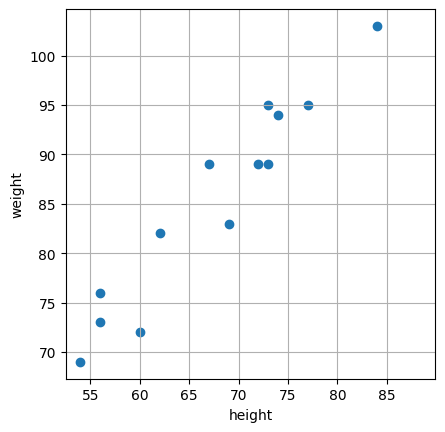

In [2]:
import matplotlib.pyplot as plt
plt.scatter(heights,weights)
plt.xlabel('height')
plt.ylabel('weight')
plt.axis('square')
plt.grid()
plt.show()

Let's make the data into a numpy array and get the mean and standard deviation of the data together with the variance and co-variance:

In [3]:
X = np.vstack((heights,weights)).T #append the two dimensions to create the data matrix
#X = np.random.randn(100,2)
#X[:,1]+=0.5*X[:,0]
N,d = X.shape
print("The dimensions of X are",X.shape)
Xm = np.mean(X,axis=0)
Xs = np.std(X,axis=0)
Xv = np.var(X,axis=0)
print("The mean is",Xm)
print("The standard deviation is",Xs)
print("The variance is",Xv)

snapshot = False #See details on the Snapshot method below
if not snapshot:
    Cx = np.cov(X.T, bias = True) # Determine dxd sized Cov. Matrix with normalization by N (Number of samples)
else:
    Cx = np.cov(X, bias = True) # Determine NxN sized Cov. Matrix

print("The co-variance matrix is\n",Cx)

The dimensions of X are (13, 2)
The mean is [67.46153846 85.30769231]
The standard deviation is [ 8.86319429 10.0566443 ]
The variance is [ 78.55621302 101.13609467]
The co-variance matrix is
 [[ 78.55621302  85.55029586]
 [ 85.55029586 101.13609467]]


Variance and co-variance are affected by the spread of the data around the mean. But what do the variance and covariance mean?

Variance is simply the power of dispersion around the mean - if the data samples are very different from each other, the variance will be high and vice-versa. However, in our context, it is more important to try to understand the co-variance. A positive covariance, like here, tells us that the two variables height and weight "go together", i.e., on average, when the height of a person is above the average height, their weight is also above the the average weight and vice-versa. If the co-variance was negative, then, on average, when one variable is above its mean, the other variable for the same sample is below its mean and vice versa. If the magnitude of covariance is high, then we can say that one variable can be predicted from the other using a simple linear model.

In order to analyze co-variance further, it is typically useful to standardize the data by making its mean 0.0 and standard deviation 1.0. This can be done below:

In [4]:
Xn = (X-Xm)/(Xs)
print("Mean after normalization",np.mean(Xn,axis=0))
print("Standard deviation after normalization", np.std(Xn,axis=0))
print("Variance after normalization", np.var(Xn,axis=0))
print("Total Variance after normalization", np.sum(np.var(Xn,axis=0)))

Mean after normalization [-6.31973106e-16  1.53723188e-16]
Standard deviation after normalization [1. 1.]
Variance after normalization [1. 1.]
Total Variance after normalization 2.0


Note that the total variance along both directions is 2.0. Let's plot the data. Notice that the trend of the data is the same whereas the mean has been changed to zero and standard deviation changed to one which is equivalent to a shifting and scaling of the data.

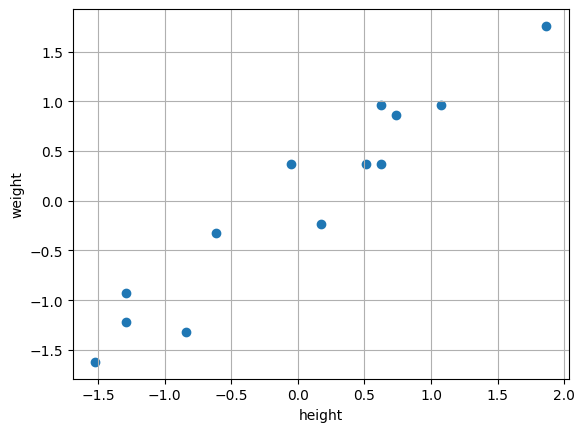

In [5]:
plt.scatter(Xn[:,0],Xn[:,1])
plt.grid()
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

Let's calculate the Covariance matrix. Note that the covariance matrix is symmetric and positive semi-definite (has non-negative eigen values). In the first reading of the tutorial, ignore the code below that corresponds to the snapshot variable being True.

In [6]:
if not snapshot:
    C = np.cov(Xn.T,bias = True) # Determine dxd sized Cov. Matrix with normalization by N (Number of samples)
else:
    C = np.cov(Xn,bias = True) # Determine NxN sized Cov. Matrix

print("Covariance matrix Dimensionality is: ",C.shape)
print("Covariance matrix is\n",C)

Covariance matrix Dimensionality is:  (2, 2)
Covariance matrix is
 [[1.         0.95979428]
 [0.95979428 1.        ]]


The diagonal component of the $d \times d$ covariance matrix correspond to variances of the two features we have (which are 1.0 after standardization) and the cross-diagnonal elements correspond to the covariance between our two features.  Note that the covariance is pretty high as is evident from the scatter plot as well. As a consequence, it should be possible to reduce the two dimensions to a single one with minimum loss of information.  Also, note that the variance is always higher than the covariance.

As discussed above, the direction of maximum variance of a given dataset is given by the Eigen vectors (or principal components) of the covariance matrix. Let's calculate the eigen values and principal components. Once a principal component $\mathbf w$ has been calculated, we can project our data along it by $z = \mathbf w^T \mathbf x$ or in matrix form $\mathbf X_{n_{(N \times d)}}\mathbf W_{(d \times d)}$, where, $\mathbf W$ is the matrix of principal components.  We can then sort the principal components in descending order with respect to the amount of variance captured along those principle components. We will also plot the scree graph which plots the fraction of variance captured along each dimension.

The eigen vectors (principal components) are 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
The variance captured along each PC: [1.95979428 0.04020572]
The fraction of variance captured along each PC:  [0.97989714 1.        ]
The eigen values are:  [1.95979428 0.04020572]
The fraction of eigen values along each PC:  [0.97989714 1.        ]


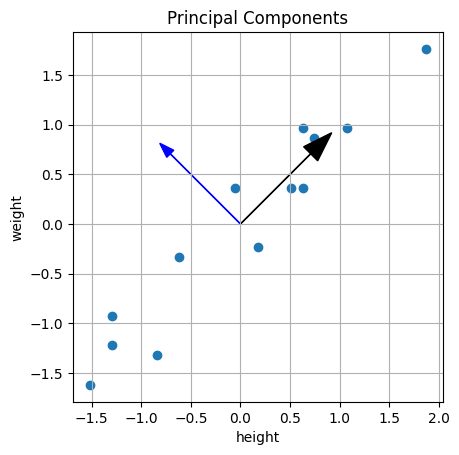

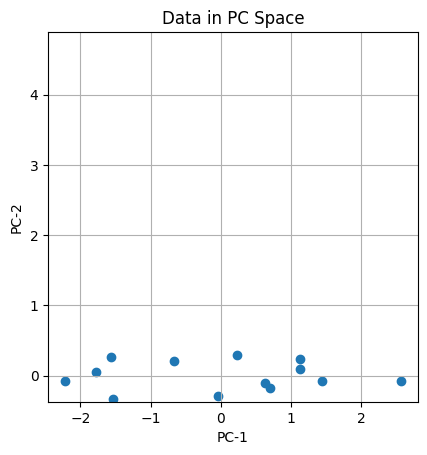

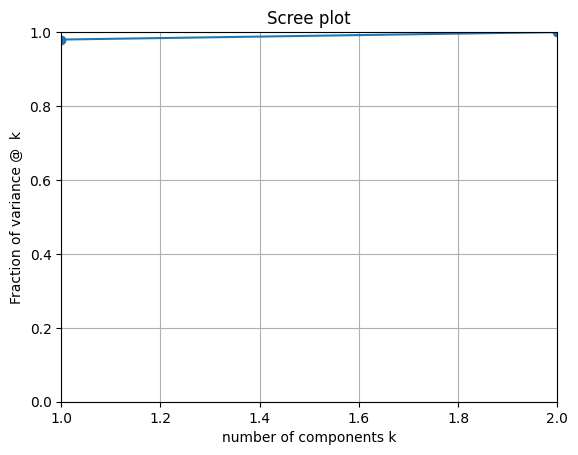

In [7]:
ev,pc = np.linalg.eig(C)
ev = np.abs(ev)

if snapshot: #ignore on the first reading
    pc = np.dot(Xn.T,pc[:,:d])
    pc/= np.linalg.norm(pc,axis=0)
    pc = np.real(pc)

cvar =  np.var(np.dot(Xn,pc),axis=0)
idx = np.argsort(-cvar)
cvar = cvar[idx]
pc = pc[:,idx]

print("The eigen vectors (principal components) are \n",pc)
print("The variance captured along each PC:",cvar)
print("The fraction of variance captured along each PC: ",np.cumsum(cvar)/np.sum(cvar))
if not snapshot:
    ev = ev[idx]
    print("The eigen values are: ",ev)
    print("The fraction of eigen values along each PC: ",np.cumsum(ev)/np.sum(ev))

plt.scatter(Xn[:,0],Xn[:,1])
plt.arrow(0,0,pc[0,0],pc[1,0],color='k',head_width=0.2)
plt.arrow(0,0,pc[0,1],pc[1,1],color='b',head_width=0.1)
plt.axis('square')
plt.xlabel('height')
plt.ylabel('weight')
plt.title("Principal Components")
plt.grid()
plt.show()

Z = np.dot(Xn,pc)
plt.scatter(Z[:,0],Z[:,1])
plt.axis('square')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.title("Data in PC Space")
plt.grid()
plt.show()
#plotting the scree plot
plt.plot(np.arange(len(cvar))+1,np.cumsum(cvar)/np.sum(cvar),'o-')
plt.axis([1,len(ev),0,1])
plt.xlabel("number of components k")
plt.ylabel("Fraction of variance @  k")
plt.grid()
plt.title("Scree plot")
plt.show()

The above plot shows the directions of the principal components: Note that:

1. There are two principal components: The one with the largest variance (eigen value) is called the first principal component whereas the other one is called the second principal component.
2. The variance along the first principal component is higher in comparison to the second.
3. The variance along the first projected direction is higher than the variance along original features which is 1.0 after normalization. Thus, the principal component is a direction that captures more information than any of the original features alone.
4. The norm of each of the principal components is 1.0.
5. The two principal components are orthogonal to each other.
6. As a consequence of 2-4 above, the principle component matrix and its transpose are inverses of each other, i.e., $\mathbf {W}^{-1}=\mathbf {W}^{T}$ or $\mathbf {W}^{T}\mathbf W=\mathbf I$. (see code below)
7. The eigen values correspond to the amount of captured variance: The fraction of variance captured along a direction is exactly equal to the fraction of eigen values. Thus, the first principal component corresponds to the largest eigen value and so on.
8. The plot of the fraction of captured variance upto $k$ principal components (called the scree plot) can be used to select how many principal components to retain when reducing dimensionality. For the original data used in this example, upto 98% variance is along the first principal component. Therefore, if the second principal component is dropped, the loss of information will be only ~2%.

### Orthogonality of PCs

Let's check if the principal components are orthogonal to one another.

In [8]:
pc1 = pc[:,0]
pc2 = pc[:,1]
print('Dot product of the first two principal components:',np.dot(pc1,pc2))
print('Norm of the first two principal components:',np.linalg.norm(pc1),np.linalg.norm(pc1))

print("The principle component matrix multiple by its transpose:\n",np.dot(pc.T,pc))

Dot product of the first two principal components: 0.0
Norm of the first two principal components: 1.0 1.0
The principle component matrix multiple by its transpose:
 [[ 1.00000000e+00 -1.01465364e-17]
 [-1.01465364e-17  1.00000000e+00]]


### Projections and variance

Let's check if projections reduce variance of the data.

Let's reduce the dimensionlity to "$k$" dimensions. Note that the projection is $ z = \mathbf w_{{(d \times 1)}}^T\mathbf x_{(d \times 1)}$ which, can be written as the matrix operation: $\mathbf Z_{(N \times k)} = \mathbf X_{{(N \times d)}}\mathbf W_{(d \times k)}$

In [9]:
k = 1
W = pc[:,0:k] #selecting upto dr principal components only
Z = np.dot(Xn,W)
print("Data after transformation\n",Z)
print("Standard deviation after transformation",np.std(Z,axis=0))
print("Variance after transformation",np.var(Z,axis=0))
print("Fraction of variance captured along the projections: ",np.var(Z,axis=0)/np.sum(np.var(Xn,axis=0)))

Data after transformation
 [[-1.77978638]
 [ 1.12334857]
 [-1.53097826]
 [-2.22059623]
 [-1.56884918]
 [-0.66829402]
 [ 1.44246909]
 [ 0.70147418]
 [ 0.62169406]
 [-0.03952072]
 [ 1.1328163 ]
 [ 0.22279341]
 [ 2.56342918]]
Standard deviation after transformation [1.39992653]
Variance after transformation [1.95979428]
Fraction of variance captured along the projections:  [0.97989714]


# PCA as a way of finding directions of maximal variance

Let's calculate the direction of maximum variance using a simple for-loop-based search to verify that we have actually found the correct answer. We will generate unit vectors along a unit circle and calculate the variance of the data after projection along a given vector. We show the scatter plot of the data overlayed by projections vectors whose length has been set equal to the variance of the data projected in that direction. We will also plot the variance vs. the angle/direction of the unit vector. Note that the highest standard deviation corresponds to the first eigen vectors.

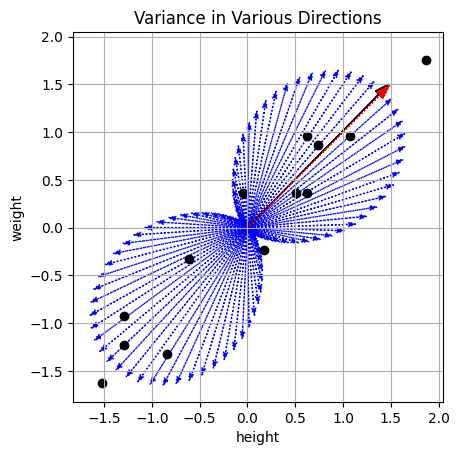

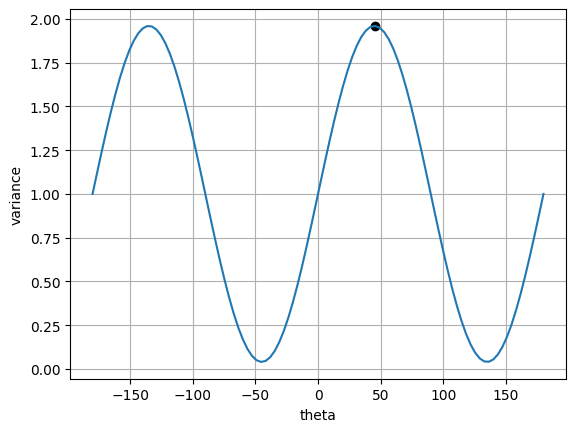

Maximum Variance: 1.959673466454711
Direction of Maximum Variance: [0.7014748877063212, 0.712694171378863]


In [10]:
import numpy as np
theta = (2*np.linspace(0,1,100)-1)*np.pi
vx = np.zeros(theta.shape[0])
maxv = 0
best_w = None
best_theta = 0
for i,t in enumerate(theta):
    wt = [np.cos(t),np.sin(t)]
    vx[i]=np.var(np.dot(wt,Xn.T))
    plt.arrow(0,0,vx[i]*wt[0],vx[i]*wt[1],color='b',head_width=0.05,linestyle=':')
    if vx[i]>maxv:
        maxv = vx[i]
        best_w = wt
        best_theta = t
plt.scatter(Xn[:,0],Xn[:,1],color='k')
plt.arrow(0,0,maxv*best_w[0],maxv*best_w[1],color='k',head_width=0.1)
plt.arrow(0,0,cvar[0]*pc[0,0],cvar[0]*pc[1,0],color='r',head_width=0.1,linestyle=':')

plt.grid()
plt.xlabel('height')
plt.ylabel('weight')
plt.axis('square')
plt.title("Variance in Various Directions")
plt.show()


plt.plot(theta*180/np.pi,vx)
plt.scatter(best_theta*180/np.pi,maxv,color = 'k')
plt.xlabel("theta")
plt.ylabel("variance")
plt.grid()
plt.show()
print("Maximum Variance:",maxv)
print("Direction of Maximum Variance:",best_w)



## Inverse projections

Now, Let's calculate the inverse projection. Note that, the projections can be written as $\mathbf z = \mathbf W^T \mathbf x$, therefore, the inverse projection (re-projection) can be written as $\mathbf x^r = \mathbf {W}^{-1} \mathbf z$. We already know that $\mathbf {W}^{-1} = \mathbf {W}^{T}$. We can use this to calculate the inverse transform using $\mathbf x^r = \mathbf {W}^{-1} \mathbf z = \mathbf {W}^{T} \mathbf z $. In matrix form we have $\mathbf X^r = \mathbf Z \mathbf W^T=\mathbf X \mathbf W \mathbf W^T$.

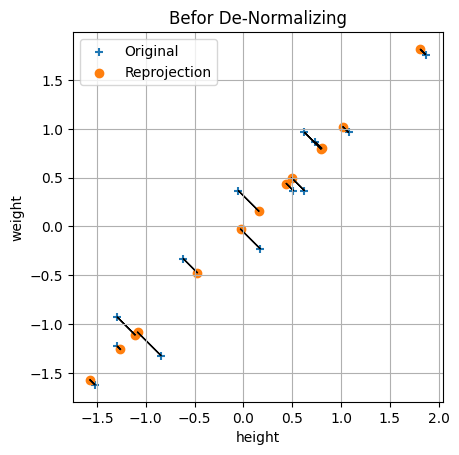

In [11]:
iW = W.T
Xr = np.dot(Z,iW)#*Xs+Xm
plt.scatter(Xn[:,0],Xn[:,1],marker = '+')
plt.scatter(Xr[:,0],Xr[:,1])
plt.legend(['Original','Reprojection'])
for x,xr in zip(Xn,Xr):
    plt.arrow(x[0],x[1],xr[0]-x[0],xr[1]-x[1])
plt.axis('square')
plt.xlabel('height')
plt.ylabel('weight')
plt.grid()
plt.title('Befor De-Normalizing')
plt.show()

We will de-normalize the data by multiplying the vector of standard deviations and adding the mean vector. We then plot the re-projected points.

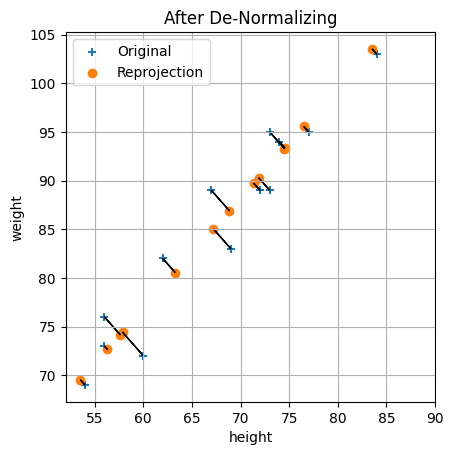

In [12]:
iW = W.T
Xr = np.dot(Z,iW)*Xs+Xm
plt.scatter(X[:,0],X[:,1],marker = '+')
plt.scatter(Xr[:,0],Xr[:,1])
plt.legend(['Original','Reprojection'])
for x,xr in zip(X,Xr):
    plt.arrow(x[0],x[1],xr[0]-x[0],xr[1]-x[1])
plt.axis('square')
plt.xlabel('height')
plt.ylabel('weight')
plt.grid()
plt.title('After De-Normalizing')
plt.show()

The reprojection or reconstruction error over the normalized data can be calculated as: $\sum_{i=1}^{N}\left\lVert \mathbf x_i - \mathbf x^r_i \right\rVert^2=\left\lVert \mathbf X - \mathbf X^r \right\rVert_F^2$, where $\mathbf x^r = \mathbf {W}^{-1} \mathbf z = \mathbf {W}^{T} \mathbf z $ and $\mathbf X^r=\mathbf Z \mathbf W^T$.

As shown below, the average reconstruction error is equal to the difference between total variance and variance along the direction of projection.

Thus, the direction of maximum variance is the direction of minimum information loss as well as the minimum reconstruction error. Therefore, the objective function of PCA can also be written as:

$min_{\mathbf W}\left\lVert \mathbf X - \mathbf X \mathbf W \mathbf W^T \right\rVert_F^2$

subject to the constraint

$\mathbf W^T \mathbf W = \mathbf I$.


In [13]:
print("Average Reconstruction Error over normalized data: ",np.mean(np.linalg.norm(np.dot(Z,iW)-Xn,axis=1)**2))
print("Difference between total variance and variance along projection:",np.sum(np.var(Xn,axis=0))-np.sum(np.var(Z,axis=0)))


Average Reconstruction Error over normalized data:  0.04020572200691667
Difference between total variance and variance along projection: 0.040205722006916744


As discussed earlier, the reconstruction error is equal to the variance that is lost due to projection. In other words, PCA can be interpreted as: 1) Projecting the data along the direction of maximum variance, or equivalently, 2) Projecting the data along the direction in which re-projection error is minimized. Thus, the loss function for PCA is the re-projection error which is equivalent to negative of the amount of captured variance.

That's all folks!

### Snapshot Method

Note that the covariance matrix $\mathbf C=\frac{1}{N}\sum_{i=1}^{N}[(\mathbf x_i-\mathbf \mu_x)(\mathbf x_i-\mathbf \mu_x)^T]\equiv \mathbf X_n \mathbf X_n^T$ calculated above is $d \times d$. Here, $\mathbf X_n$ is the normalized data matrix of size $d \times N$. However, if $d>N$, as in the case of image data, it would be computationally more efficient to formulate an equivalent covariance matrix $\mathbf C'\equiv \mathbf X_n^T \mathbf X_n$ of size $N \times N$ and find its $N \times 1$ eigen vectors $\mathbf w'$ which can then be used to compute the $d \times 1$ eigen vectors $\mathbf w$ of $\mathbf C$ by $\mathbf w = \mathbf X_n^T \mathbf w'$ and normalizing $\mathbf w$ to unit-norm. This is called the snapshot method and it is widely used for cases in which $d>N$. You can test this method out by setting the variable 'snapshot' to True in the above code.

### Exercises


1. Change the data and see its impact. You can change it by adding some gaussian noise using the np.random.randn function. See how this affects the scatter plot, the covariance matrix, the scree plot and the principal components and their Eigen values.

2. Can you overlay the principal components of your data as vectors over the scatter plot to see whether the direction of maxium variance being found is actually correct.

3. Try changing the number of reduced dimensions from 1 to 2. What happens? Please explain your observations.

4. See how can you apply PCA from the library scikit-learn and use it for classification or regression coupled with an appropriate machine learning model. It is important to note that PCA is an unsupervised technique and labels or target values should not be used while determining the principal components.

5. How do we apply PCA over previously unseen data?

6. How can PCA be used for visualization of high dimension data?

7. How is PCA used in Eigen Faces for face recognition? (optional)

8. How can PCA be used for clustering (optional).

9. What are the underlying assumptions of PCA? (optional)

10. What are the limitations of PCA? (optional)

11. How can PCA be kernelized? (optional)

12. What happens if you project the data onto the second principal component only? (optional)

13. If the number of features is large, then the covariance matrix is going to be huge. How can we apply PCA to high dimensional data? (Hint: Snapshot method for PCA) (optional)

14. How can PCA be used for data transmission? (optional)

# Application: Projecting Data

In this exercise, we will be using PCA from sk-learn to visualize the Iris dataset which consists of 4 dimensions. More importantly we will be plotting the [scree plot](https://en.wikipedia.org/wiki/Scree_plot) which tells us how many components we should pick based on the proportion of variance explained.

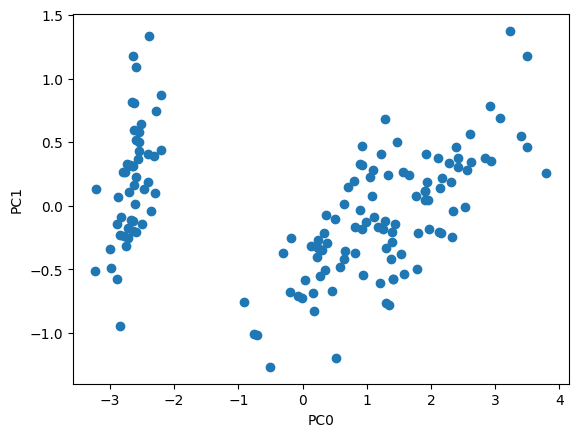

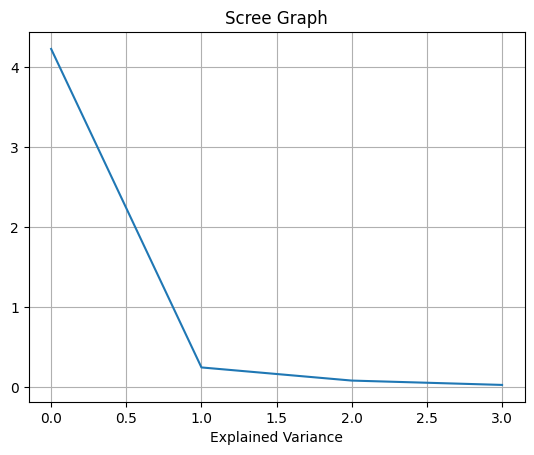

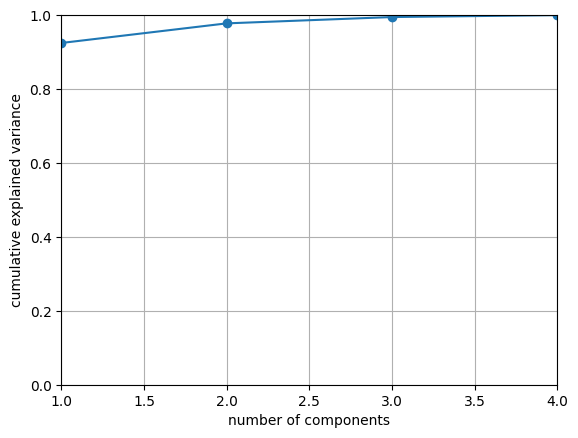

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
from sklearn.decomposition import PCA #import PCA
pca = PCA(n_components=4)
pca.fit(X) #training PCA
projected = pca.transform(X) #projecting the data onto Principal components

# plot scatter plot of the data in terms of the first two PCs
plt.scatter(projected[:,0],projected[:,1])
plt.xlabel('PC0');plt.ylabel('PC1')

#plot the variance and the scree plot
plt.figure()
plt.plot(pca.explained_variance_); plt.grid();
plt.xlabel('Explained Variance')
plt.title('Scree Graph')

plt.figure()
plt.plot(np.arange(len(pca.explained_variance_ratio_))+1,np.cumsum(pca.explained_variance_ratio_),'o-') #plot the scree graph
plt.axis([1,len(pca.explained_variance_ratio_),0,1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()
plt.show()

# Exercise:

1. Can you color each of the data points with a different color based on the classes?
2. Can you plot a scatter plot of two other principal components?
3. How can we set the number of principal components used in the analysis using sklearn directlyt? Hint: check the help for pca.

# Advanced: Association between PCs and original features
We can measure the contribution of a feature variable to each principal components. If it's close to 1 then a particular pc is well explained by that variable. We can obtain these by squaring the eigen vectors (principal components). Typically, these are represented such that each column is a PC and each row is the original feature. Looking at the matrix below, what feature dominates the first PC?

In [15]:
import pandas as pd
df = pd.DataFrame(pca.components_.T**2, index=iris.feature_names)
print(df)

                          0         1         2         3
sepal length (cm)  0.130600  0.431109  0.338759  0.099532
sepal width (cm)   0.007144  0.533136  0.357497  0.102223
petal length (cm)  0.733885  0.030058  0.005812  0.230245
petal width (cm)   0.128371  0.005697  0.297932  0.568000


Loadings, also known as factor loadings or coefficients, represent the relationships between the original feature variables and the principal components. They indicate how each original variable contributes to (or "loads") each principal component. Loadings are obtained by multiplying the eigenvectors by the square root of the corresponding eigenvalues. The loadings are stored in the loading matrix, where each column represents a principal component, and each row represents an original variable.

In [16]:
eigen_vectors = pca.components_.T
eigen_values = pca.explained_variance_
loadings_matrix = eigen_vectors * np.sqrt(eigen_values)
df = pd.DataFrame(loadings_matrix, index=iris.feature_names)
print(df)

                          0         1         2         3
sepal length (cm)  0.743108  0.323446 -0.162770 -0.048707
sepal width (cm)  -0.173801  0.359689  0.167212  0.049361
petal length (cm)  1.761545 -0.085406  0.021320  0.074081
petal width (cm)   0.736739 -0.037183  0.152647 -0.116354


# Advanced: Using a different library for PCA and Biplots

Here, we will utilize a different library for performing PCA which makes plotting easier. It also plots a [biplot](https://en.wikipedia.org/wiki/Biplot) of the data whcih shows the loadings matrix of the data to help us understand the contribution of each feature to a principal component.


In [17]:
!pip install pca

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot
[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


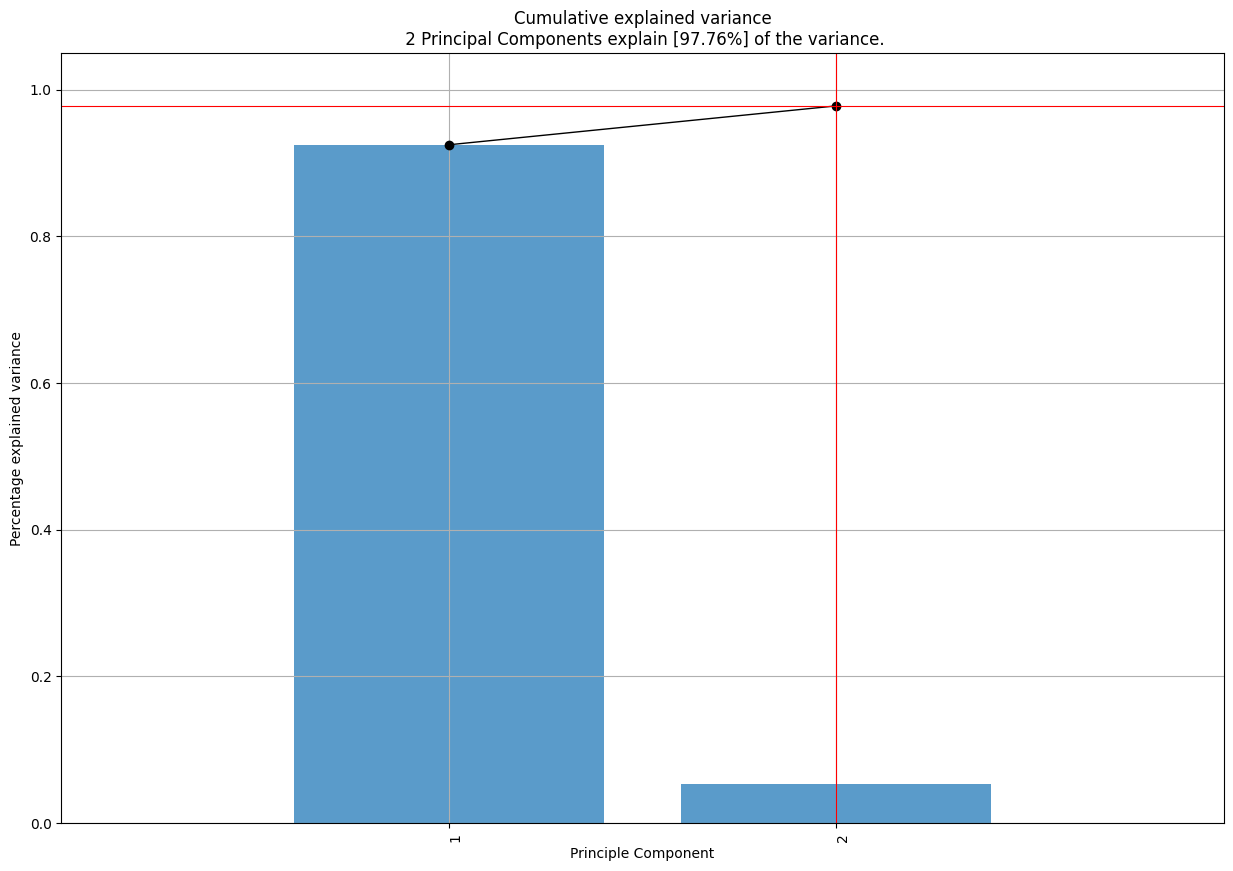

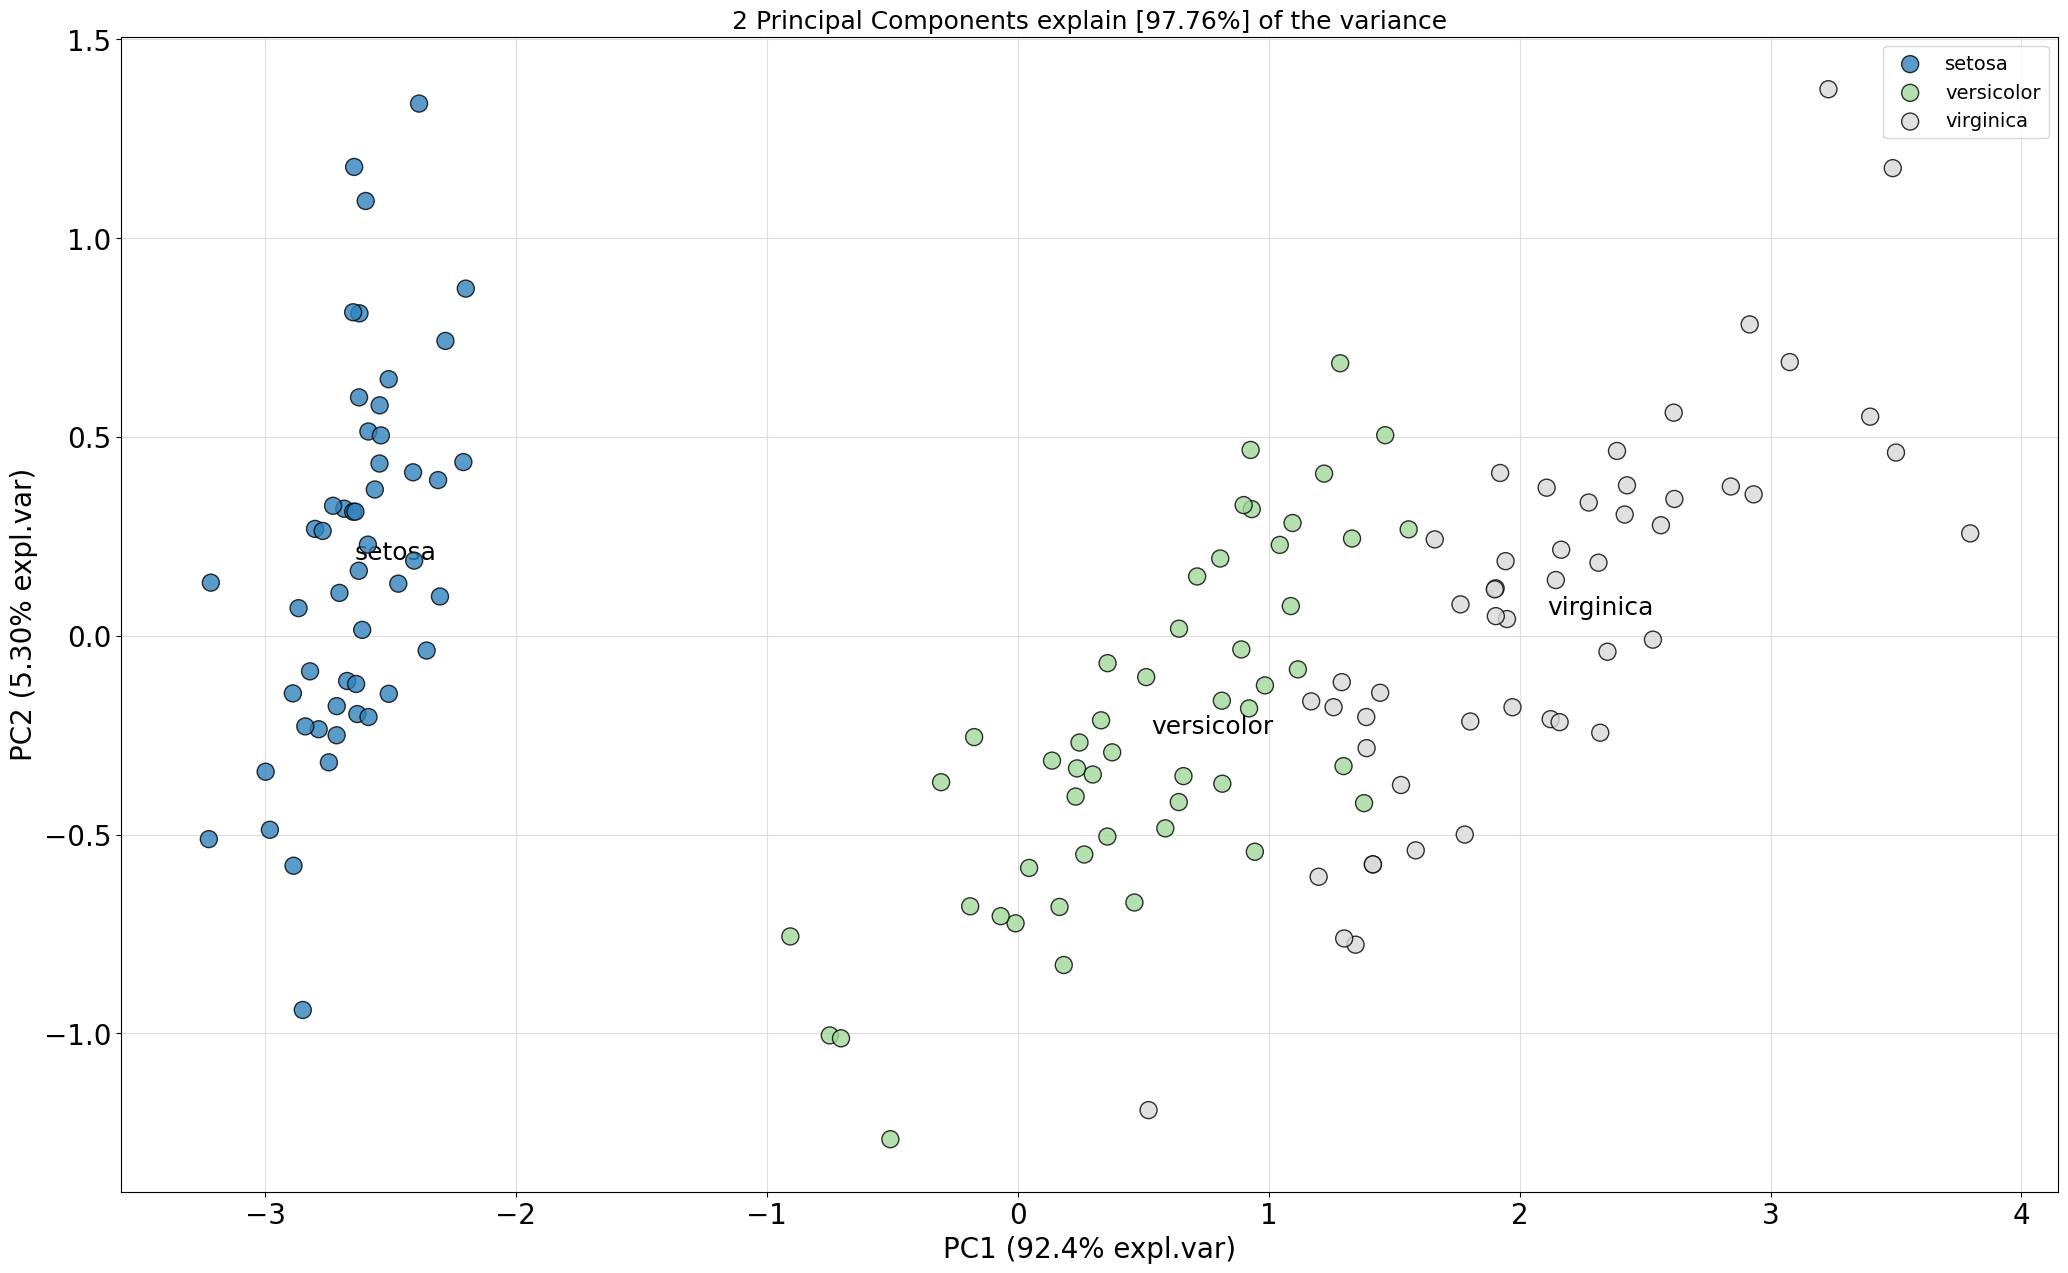

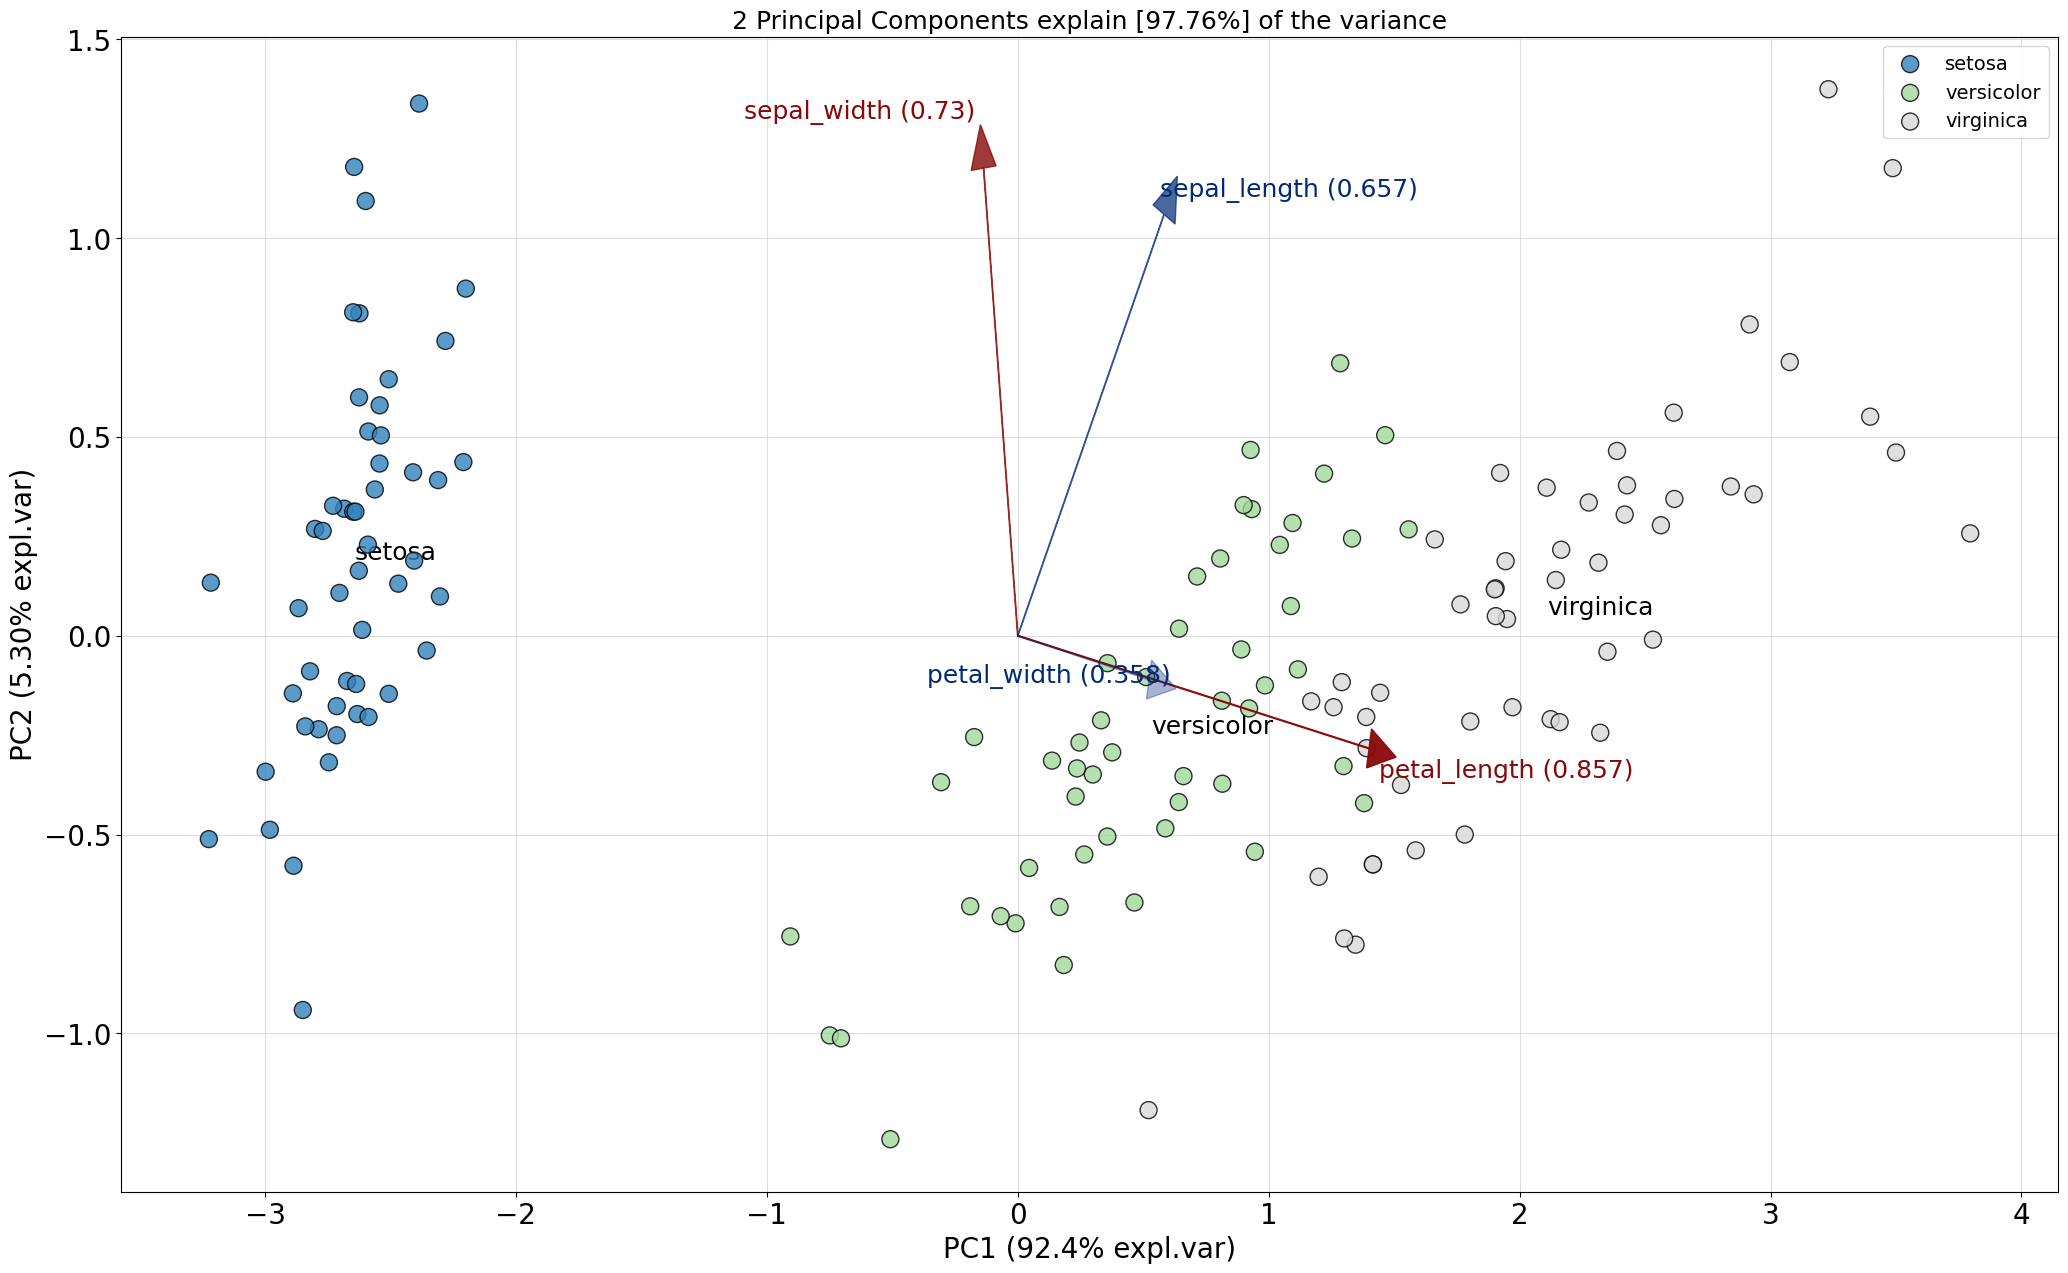

In [18]:

from pca import pca
import pandas as pd

# Load sample data, represent the data as a pd.DataFrame
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(data=iris.data,
                 columns=iris.feature_names)
X.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
y = pd.Categorical.from_codes(iris.target,
                              iris.target_names)

# Initialize the PCA, either reduce the data to the number of
# principal components that explain 95% of the total variance...
model = pca(n_components=0.95)
# ... or explicitly specify the number of PCs
model = pca(n_components=2)

# Fit and transform
results = model.fit_transform(X=X, row_labels=y)

# Plot the explained variance
fig, ax = model.plot()

# Scatter the first two PCs
fig, ax = model.scatter()

# Create a biplot
fig, ax = model.biplot(n_feat=4)

#Exercise:

1. What are "loadings"? What is their intuitive explanation?
2. What is a loading matrix?

# Advanced: Using SVD for PCA

Under the hood, like almost all other libraries, scikit-learn PCA uses Singular Value Decomposition. One can  get PCA using Singular Value Decomposition (SVD) as follows.You can read more the underlying mathematics in [this paper](https://www.cs.cmu.edu/~tom/10701_sp11/slides/pca_wall.pdf).


Text(0, 0.5, 'PC1')

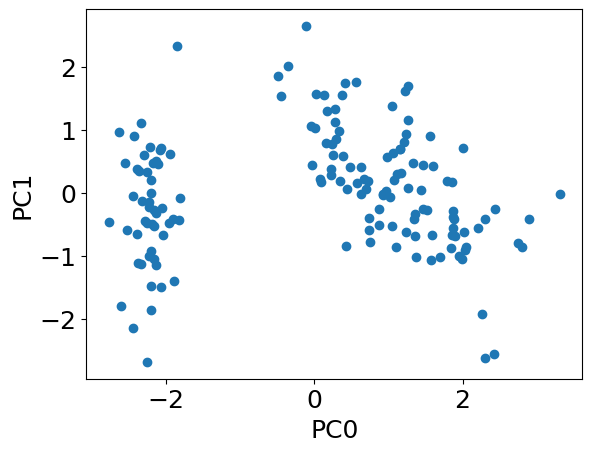

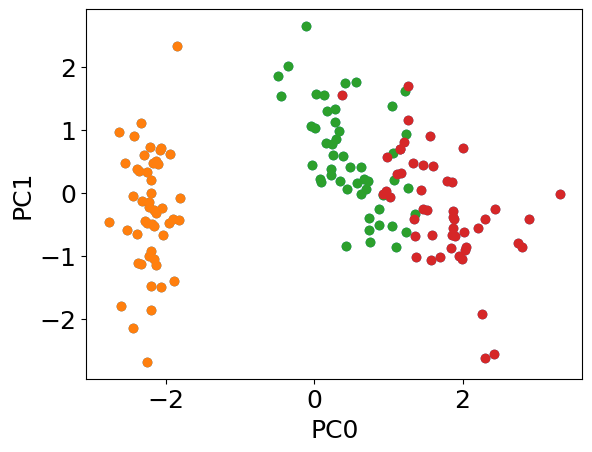

In [19]:
from sklearn.preprocessing import StandardScaler
Xn = StandardScaler().fit_transform(X)
U,S,V = np.linalg.svd(Xn)
# V are the principal components
# The projection of data onto the PC's is Z = U*S = Xn@V.T (both are equivalent)
d = Xn.shape[1]
U = U[:,:d]
Z = U*S #multiply with d/(d-1) to align with "pca" from sklearn as pca.singular_values_ = singular values obtained from SVD and (singular values)**2/(d-1) = eigen values
plt.scatter(Z[:,0],Z[:,1]);plt.xlabel('PC0');plt.ylabel('PC1')
Z0 = Xn@V.T
plt.figure();
plt.scatter(Z0[:,0],Z0[:,1]);
for label in np.unique(y):
    indices = np.where(y == label)
    plt.scatter(Z0[indices, 0], Z0[indices, 1], label=label)
plt.xlabel('PC0');plt.ylabel('PC1')

#Advanced: Mutual Information Re-scaling

PCA uses correlation to project the data points along principal components ($z = V^Tx$). The problem with correlation is that "a correlation of 0.5 is closer to zero than it is to 1.0." (See: [NN Taleb's explanation of this](https://youtu.be/o9Ac85xdjE4?t=525)). Thus, we need to re-scale the correlation so that when data is plotted in the PCA space it actually aligns with the true notion of information (see papers cited below). This will tell us what groups of samples dominate each PC or to what degree each PC “explains” a certain sample using "mutual information".

A heuristic approximation of mutual information is:

$$(MI_{X,V})_{i,j} = -sgn(U_{i,j} log_2 (\sqrt(1-U_{i,j}^2))$$

where $U_{i,j}$ is the correlation between data point $i$ and PC $j$.

This method serves a dual purpose:  

1) it measures how many bits of information are shared between a given sample and a principal componen as MI(Y;X) measures  "How much are you willing to bet on Y knowing X”.

2) it gives a sense of how well an association between groups of samples and each individual sample and a principal component can be distinguished from chance.

We implement this idea below for out plots.

Taleb, Nassim Nicholas, Pierre Zalloua, Khaled Elbassioni, Andreas Henschel, and Daniel E. Platt. “Informational Rescaling of PCA Maps with Application to Genetic Distance.” arXiv.org, March 14, 2023. https://arxiv.org/abs/2303.12654v1.

Platt, Daniel E., Hovig Artinian, Francis Mouzaya, Wissam Khalil, Francois G. Kamar, Elizabeth Matisoo-Smith, Francesc Calafell, Nassim Nicolas Taleb, and Pierre Zalloua. “Autosomal Genetics and Y-Chromosome Haplogroup L1b-M317 Reveal Mount Lebanon Maronites as a Persistently Non-Emigrating Population.” European Journal of Human Genetics 29, no. 4 (April 2021): 581–92. https://doi.org/10.1038/s41431-020-00765-x.

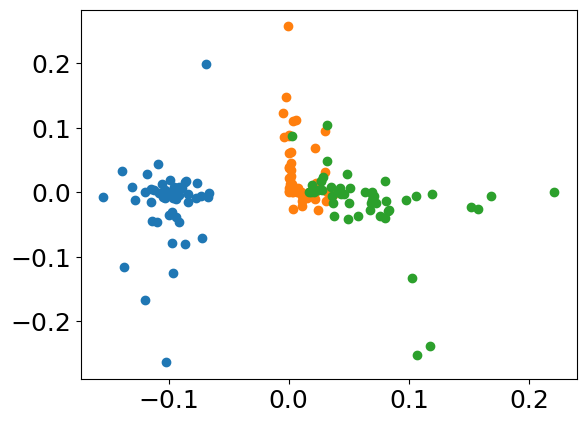

In [20]:
Z_mi = -np.sign(U)*0.5*np.log2(1-U**2)*S/np.sqrt(d-1)
#uncomment last part to get equivalent of loadings
plt.figure()
#plt.scatter(Z_mi[:,0],Z_mi[:,1]) #with mi scaling

for label in np.unique(y):
    indices = np.where(y == label)
    plt.scatter(Z_mi[indices, 0], Z_mi[indices, 1], label=label)

In [21]:
y

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']

# Application: Eigen Digits

Let's apply PCA to the MNIST dataset which consists of 8 by 8 images of numbers. We can use the scikit-learn PCA tool. This approach is very similar to Eigen faces which are used for face recognition. We can call this "Eigen Digits".

Let's load the data using sklearn.

(1797, 64)


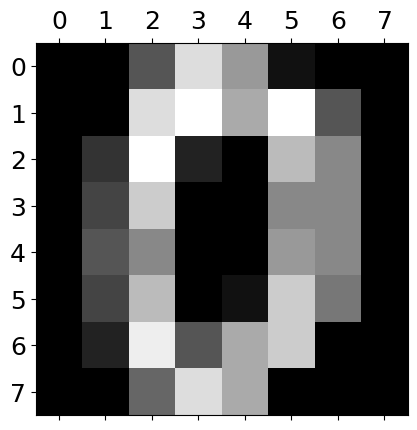

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
plt.matshow(digits.data[0].reshape(8,8),cmap='gray')

Let's apply PCA to this data. We will keep the number of principal components equal to the number of dimensions (64) to see how much variance we can capture with increasing the number of components. This can be done using the scree graph which plots the proportion of captured variance vs. the number of components being used.

How many components are required for capturing 90% variance?

How many components are required for near perfect reconstruction?

(1797, 64)
(1797, 64)


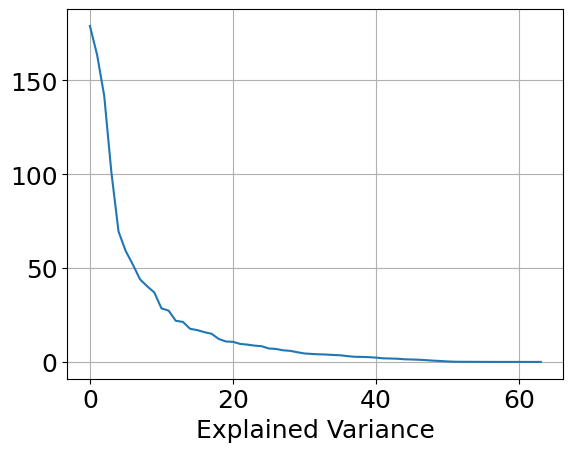

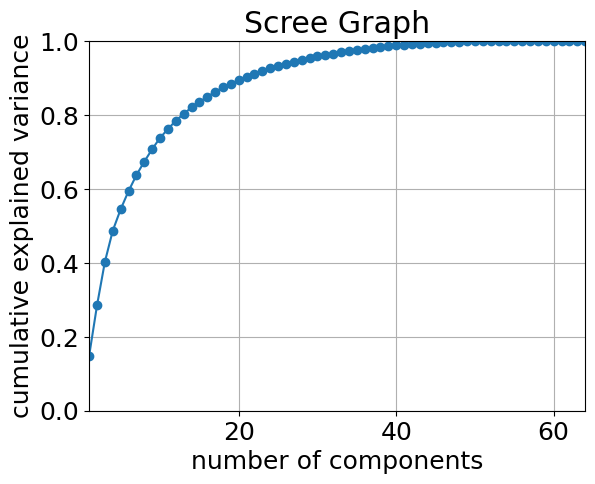

In [23]:
from sklearn.decomposition import PCA #import PCA
pca64 = PCA(n_components=64)
pca64.fit(digits.data) #training PCA
projected = pca64.transform(digits.data) #projecting the data onto Principal components
print(digits.data.shape)
print(projected.shape)
plt.plot(pca64.explained_variance_); plt.grid();
plt.xlabel('Explained Variance')
plt.figure()
plt.plot(np.arange(len(pca64.explained_variance_ratio_))+1,np.cumsum(pca64.explained_variance_ratio_),'o-') #plot the scree graph
plt.axis([1,len(pca64.explained_variance_ratio_),0,1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Scree Graph')
plt.grid()
plt.show()

Let's show the original data and the projected data as images. We take two arbitrary digits and see the effect of applying PCA. Note that the projected digits look nothing like the original ones but are definitely different from each other. Note that the projected digits have a large number of dimensions equal to zero.

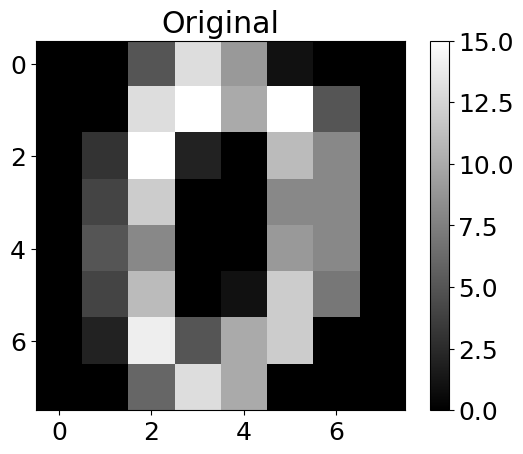

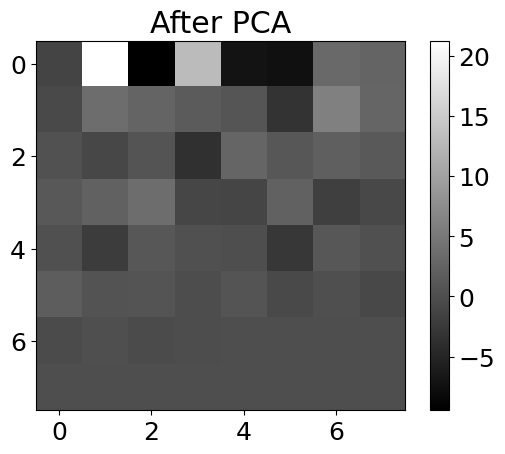

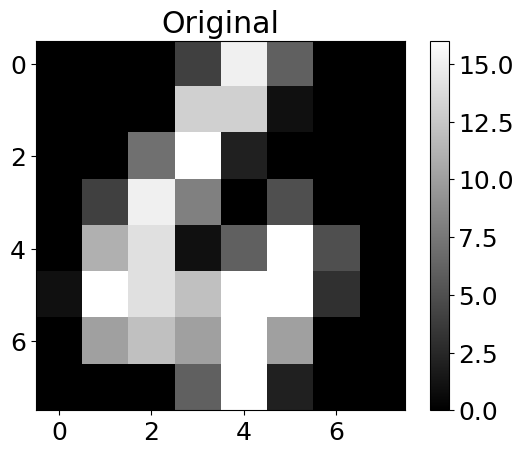

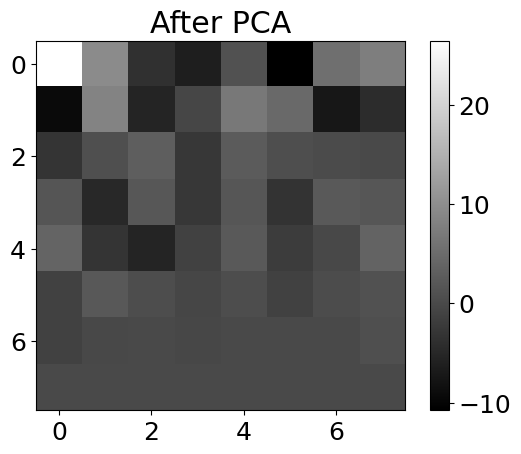

In [24]:
plt.imshow(digits.data[0,:].reshape(8,8),cmap='gray'); plt.title('Original'); plt.colorbar(); plt.show()
plt.imshow(projected[0,:].reshape(8,8),cmap='gray'); plt.title('After PCA');  plt.colorbar(); plt.show()
plt.imshow(digits.data[900,:].reshape(8,8),cmap='gray'); plt.title('Original'); plt.colorbar(); plt.show()
plt.imshow(projected[900,:].reshape(8,8),cmap='gray'); plt.title('After PCA');  plt.colorbar();plt.show()


# PCA for visualization

PCA can be used for visualization. Let's plot two principal components against each other. This allows us to visualize 64 dimensional data in two dimensions for exploratory data analysis. As you can see below, you get a pretty good clustering in the PCA space in which similar examples corresponding to the same digit cluster together.

What digits are more similar to each other?

What happens when you change the principal components for visualization?

Can you find the principal components that provide the best separation between classes?

<ipython-input-25-31bd7ca316d2>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10));


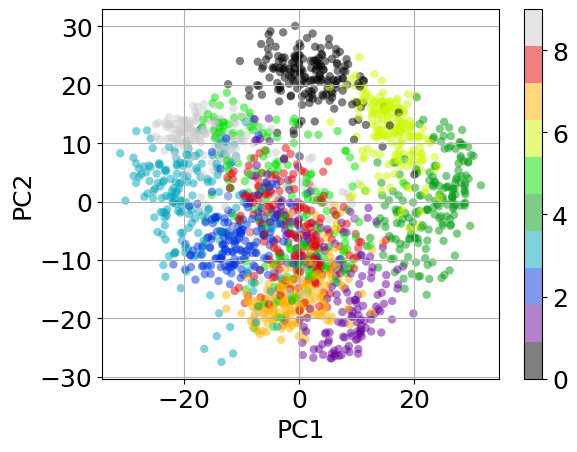

In [25]:
i1 = 0 #first principal component
i2 = 1 #second principal component
plt.scatter(projected[:, i1], projected[:, i2],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar();
plt.show()

Note that the principal direction eigen vectors are 64 dimensional vectors which can be viewed as digits (or eigen digits). Below, we show the two principal directions selected above and the principal direction correspondng to lowest variance. These images show us what kind of patterns are being learned. Notice that the outer boundary is zero for all principal directions (or eigen digits) because no digits occur there so the image can easily be reduced in dimensions.

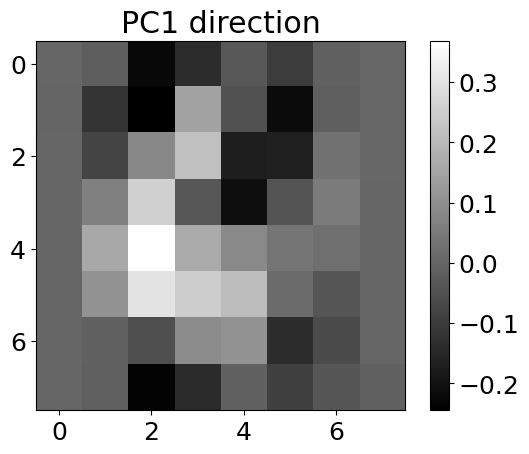

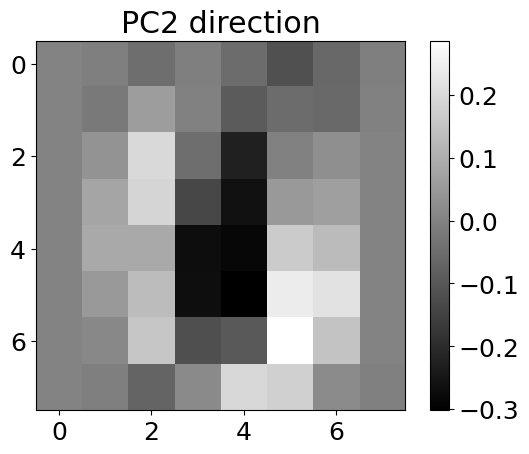

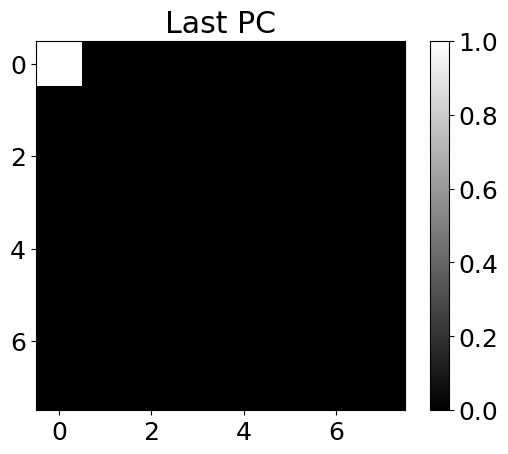

In [26]:
plt.imshow(pca64.components_[i1,:].reshape(8,8),cmap='gray'); plt.title('PC1 direction'); plt.colorbar(); plt.show()
plt.imshow(pca64.components_[i2,:].reshape(8,8),cmap='gray'); plt.title('PC2 direction'); plt.colorbar(); plt.show()
plt.imshow(pca64.components_[-1,:].reshape(8,8),cmap='gray'); plt.title('Last PC'); plt.colorbar(); plt.show()


# PCA Reconstruction
Now we will reduce the image dimensions from $(d,d)$ to $(d_r,d_r)$ by picking the dimensions using PCA. Note that this is different from resizing the image which can incur a large information loss in comparison to PCA. Dimensionality reduction of the (8,8) image to 4 dimensions would allow near perfect reconstruction of the original image. In contrast compare if we were to down-scale the image to (2,2) which is still 4 numbers and how that would distort the image. Below we show the original, transformed and reconstructed image.

Try it for different digits and See what is the effect of changing the number of dimensions or reconstruction accuracy.

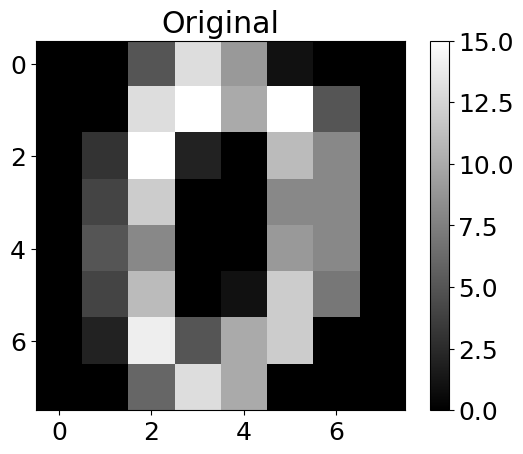

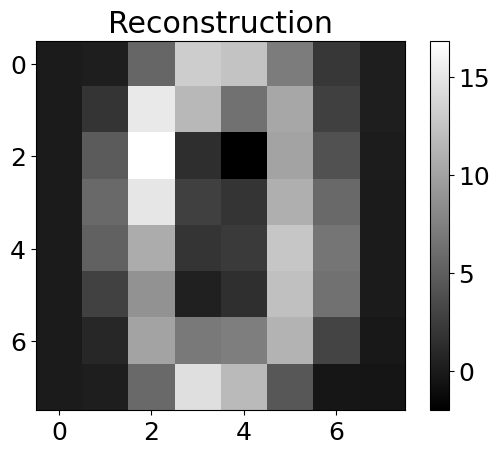

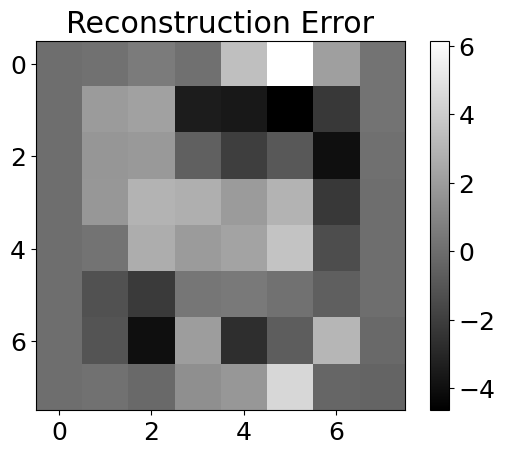

In [27]:
dr = 4
X = digits.data
pca = PCA(n_components=dr).fit(X)
x0 = digits.data[0].reshape(1, -1) #we need to do .reshape(1, -1) as we only have a single example
z0 = pca.transform(x0)
xr = pca.inverse_transform(z0)

plt.imshow(x0.reshape(8,8),cmap='gray'); plt.title('Original'); plt.colorbar(); plt.show()
#plt.imshow(components[0,:].reshape(dr,dr),cmap='gray'); plt.title('Projection'); plt.colorbar(); plt.show()
plt.imshow(xr.reshape(8,8),cmap='gray'); plt.title('Reconstruction'); plt.colorbar(); plt.show()
plt.imshow(xr.reshape(8,8)-x0.reshape(8,8),cmap='gray'); plt.title('Reconstruction Error'); plt.colorbar(); plt.show()


# Important: Expressing an example as a linear combination of its PCs

Note that  PCA allows expressing a given example in terms of a linear combination of the principal component eigen vectors. If we take the digit we just reconstructed using four eigen vectors, we know that this digit can now be represented in terms of the 4 principal coordinate values as follows (with $k=4$):

$$\mathbf x_{reconstructed}= \mathbf{\mu_x} + \mathbf W_{(d,k)}\mathbf z = \mathbf{\mu_x} + z_1 \mathbf w_1 + z_2 \mathbf w_2 + ... + w_k \mathbf v_k $$

As each of the $d=64$ dimensional eigen vectors for this example can reshaped to (8,8) and shown as an image, another way of interpreting PCA is that it allows us to express a given image (more precisely its reconstruction) as a linear combination of its  "eigen digits" where each of the eigen vectors receives a weight equal to its PCA coefficient.



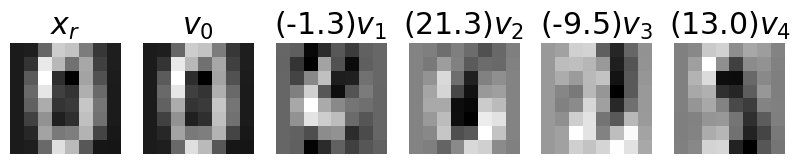

In [28]:
xr_sum = pca.mean_.reshape(8,8)
k = len(z0[0])
Wpca = pca.components_
for j in range(k):
  xr_sum+=z0[0,j]*Wpca[j,:].reshape(8,8)

plt.figure(figsize=(10, 2))
plt.subplot(1, 6, 1); plt.imshow(xr.reshape(8,8),cmap='gray');plt.title('$x_r$'); plt.axis('off')
plt.subplot(1, 6, 2); plt.imshow(pca.mean_.reshape(8,8),cmap='gray');plt.title('$v_0$'); plt.axis('off')
plt.subplot(1, 6, 3); plt.imshow(pca.components_[0,:].reshape(8,8),cmap='gray'); plt.title(f'({z0[0,0]:.1f})$v_1$'); plt.axis('off')
plt.subplot(1, 6, 4); plt.imshow(pca.components_[1,:].reshape(8,8),cmap='gray'); plt.title(f'({z0[0,1]:.1f})$v_2$'); plt.axis('off')
plt.subplot(1, 6, 5); plt.imshow(pca.components_[2,:].reshape(8,8),cmap='gray'); plt.title(f'({z0[0,2]:.1f})$v_3$'); plt.axis('off')
plt.subplot(1, 6, 6); plt.imshow(pca.components_[3,:].reshape(8,8),cmap='gray'); plt.title(f'({z0[0,3]:.1f})$v_4$'); plt.axis('off'); plt.show()


# Implementation Exercise

Use the code above to plot the scree plot for a dataset of your choice and visualize different classes in the first two principal components and try interpreting what the principal component eigen vectors mean.

(c) Dr. Fayyaz Minhas